# Importing Libraries

In [1]:
# For Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Import ML Model Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

# importing data

In [2]:

raw_dataset = pd.read_csv('./kidney_disease.csv')

# making csv a pandas dataframe
dataframe = pd.DataFrame(raw_dataset)

# Formating datatype

In [3]:
# setting random seeds
np.random.seed(42)

# dropping 'id' column
dataframe.drop('id', axis = 1, inplace = True)


# rename column names to make it more user-friendly
dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                     'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
                     'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
                     'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
                     'aanemia', 'class']

In [4]:
# converting necessary columns to numerical type
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')


# Extracting categorical and numerical columns
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']


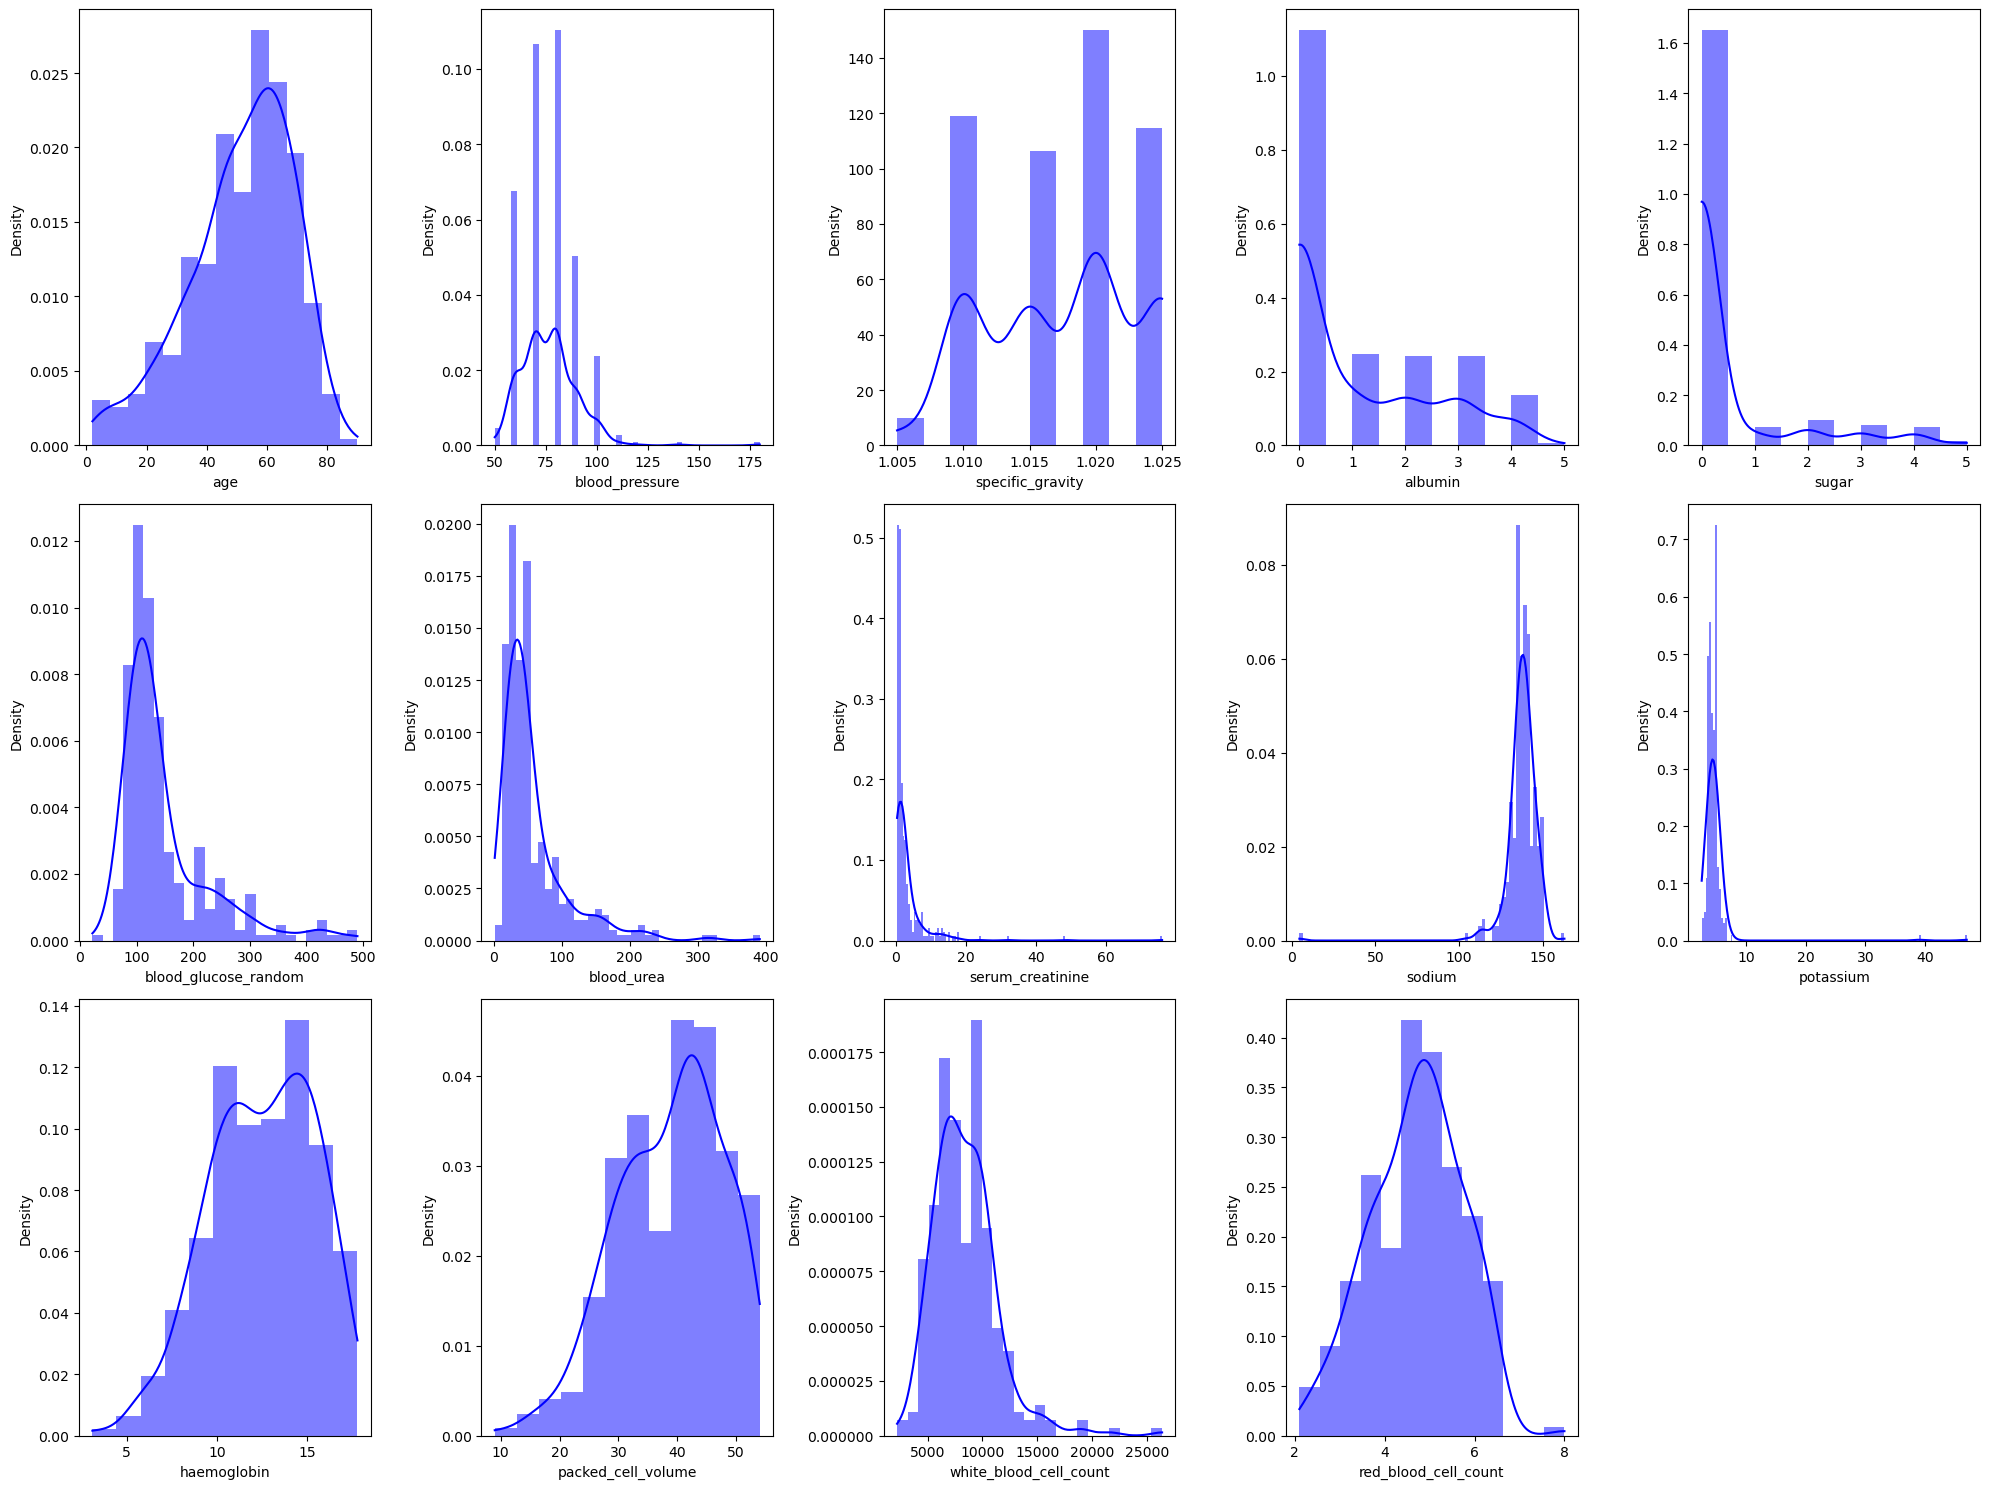

In [5]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (dataframe[column],color='blue',kde=True, stat="density", linewidth=0)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

C:\Users\yashk\AppData\Local\Temp\ipykernel_5244\730118824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
C:\Users\yashk\AppData\Local\Temp\ipykernel_5244\730118824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
C:\Users\yashk\AppData\Local\Temp\ipykernel_5244\730118824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe[column], palette = 'deep',color='black')
C:\Users\yashk\AppData\Local\Temp\ipykernel

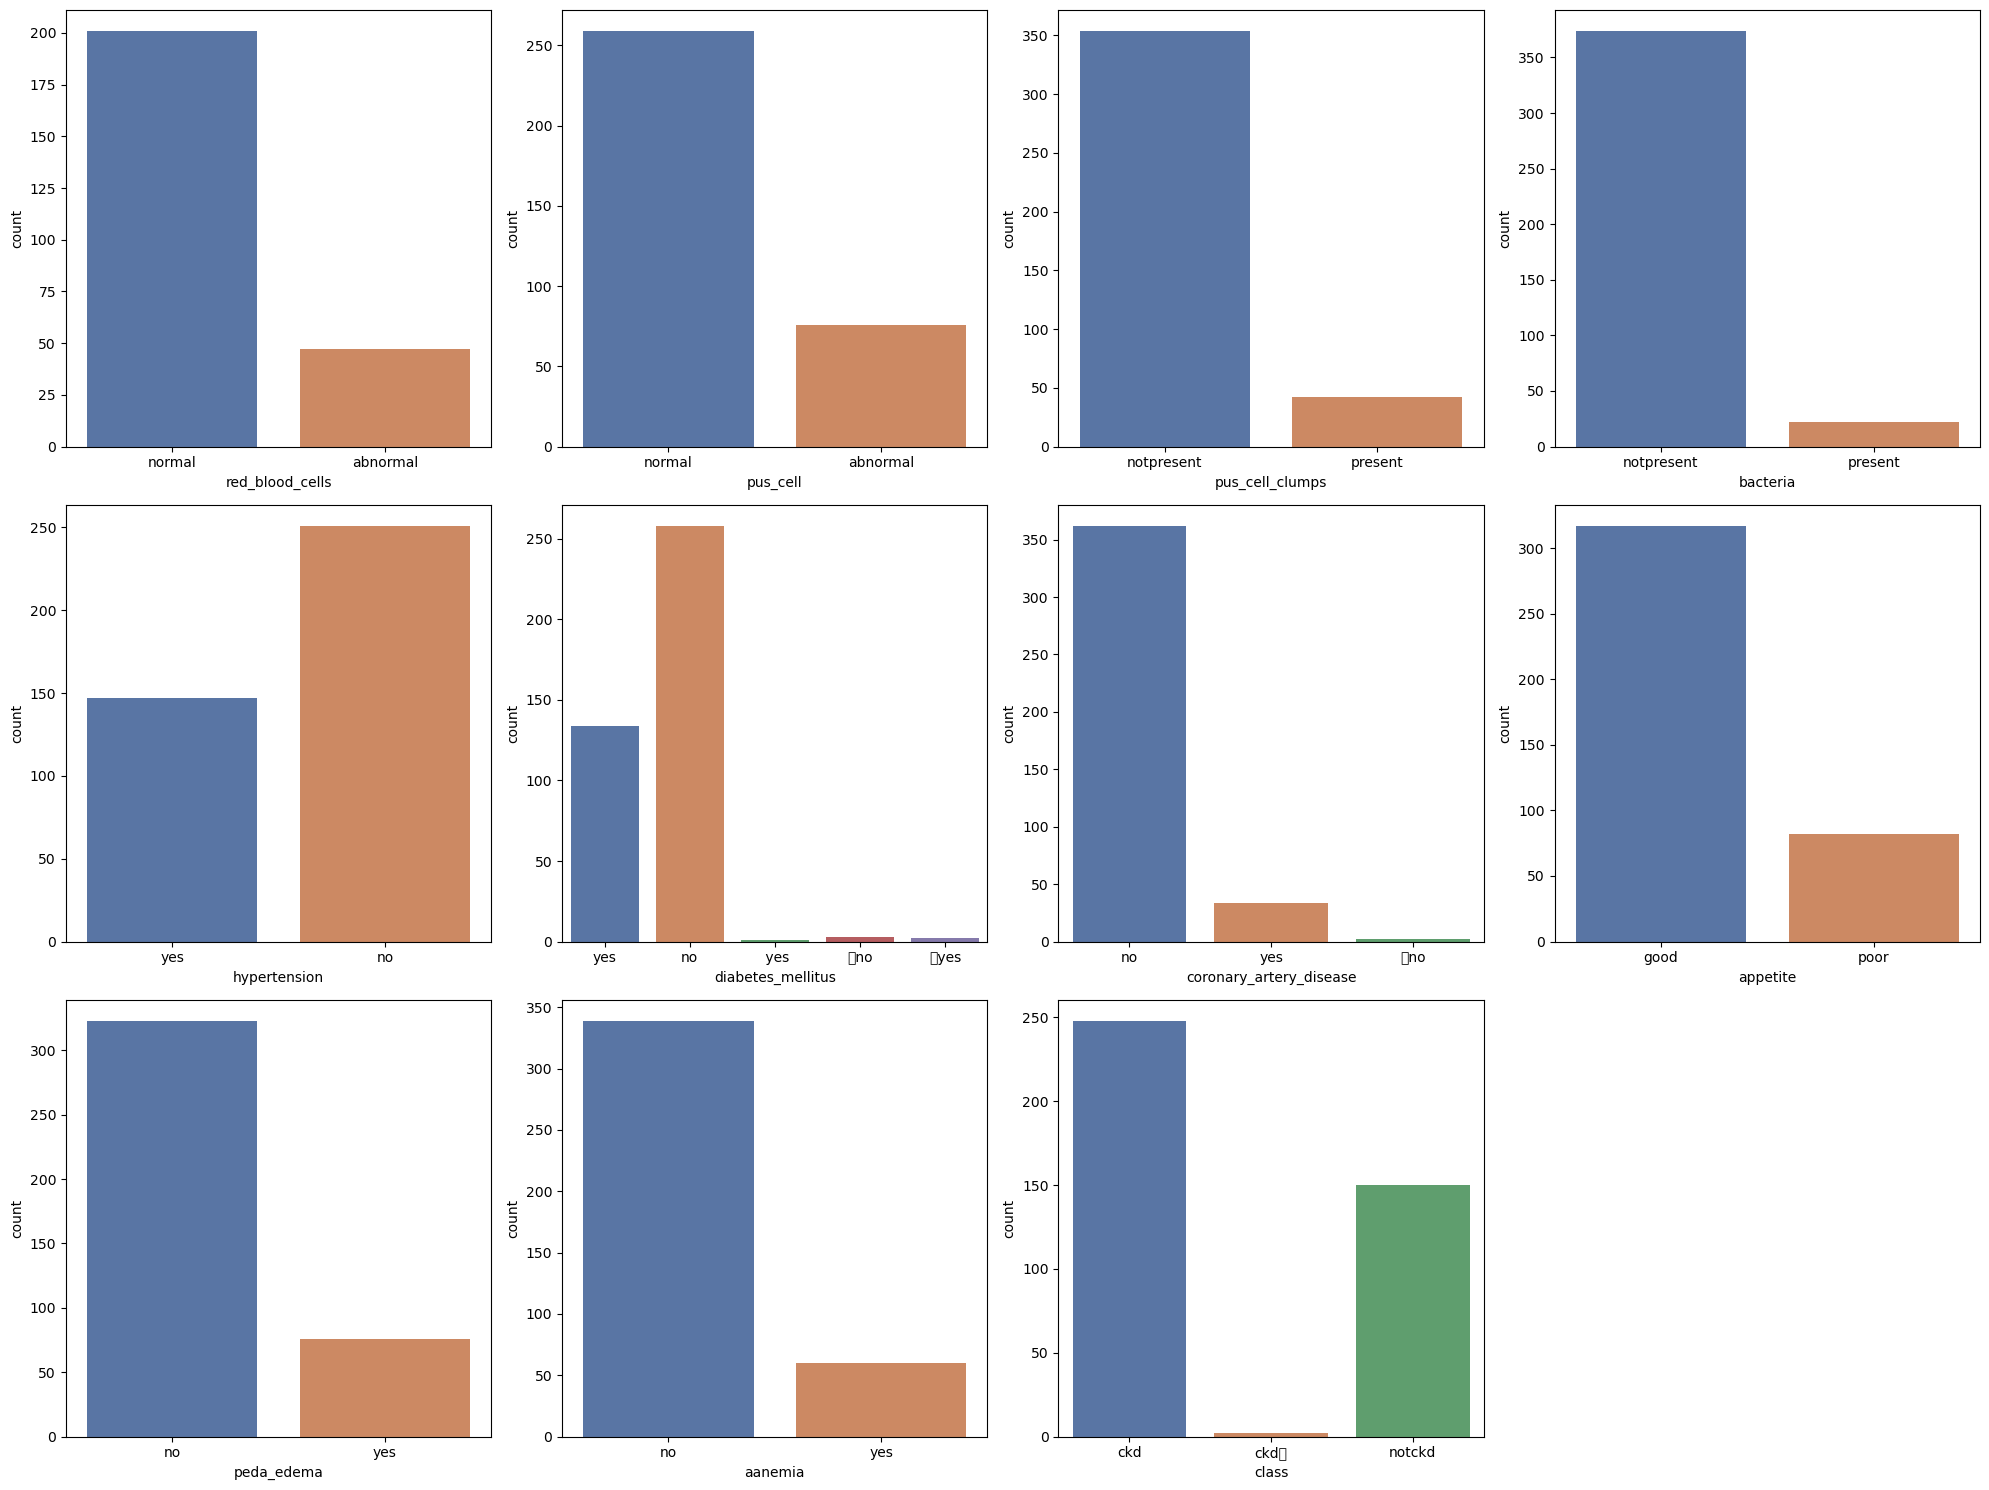

In [6]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = dataframe[column], palette = 'deep',color='black')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [7]:
# replace incorrect values
dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataframe['coronary_artery_disease'] = dataframe['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
dataframe['class'] = dataframe['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# replacing 'ckd' with 0 and 'not ckd' with 1
dataframe['class'] = dataframe['class'].map({'ckd': 0, 'not ckd': 1})

# making 'class' column into a numerical column
dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

C:\Users\yashk\AppData\Local\Temp\ipykernel_5244\171229969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [8]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = dataframe[feature].dropna().sample(dataframe[feature].isna().sum())
    random_sample.index = dataframe[dataframe[feature].isnull()].index
    dataframe.loc[dataframe[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)



# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)


# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)


# Feature Encoding

In [9]:
le = LabelEncoder()

for col in cat_cols:
    dataframe[col] = le.fit_transform(dataframe[col])


dataframe.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,...,38.0,6000.0,4.3,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Splitting  Dataset

In [10]:
imp_col = ['age','serum_creatinine','blood_pressure','blood_urea','haemoglobin','albumin','blood_glucose_random','potassium','aanemia','hypertension','class']
new_data = dataframe[imp_col]

# X = feature matrix
X = new_data.drop("class", axis=1)     # everything except 'class' column

# Y = lables
Y = new_data['class']      # only 'class' column

# spliting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Training Models

In [11]:
# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

# SVM
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, Y_train)

# Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, Y_train)

# Logistic Regression
clf_log = LogisticRegression(solver='lbfgs', max_iter=2500);
clf_log.fit(X_train, Y_train);

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

# # XG Boost
# clf_xgb = XGBClassifier(objective = 'binary:logistic', 
#                         learning_rate = 0.5, 
#                         max_depth = 5, 
#                         n_estimators = 150, 
#                         eval_metric='mlogloss',  
#                         use_label_encoder=False)
                        
# clf_xgb.fit(X_train, Y_train)

# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)

# Ada Boost
clf_ada = AdaBoostClassifier(estimator = clf_dtc)
clf_ada.fit(X_train, Y_train)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Evaluation

### Random Forest

#### Classification Report

In [12]:
Y_pred = clf_rand_forest.predict(X_test)

rand_forest_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### Mean Absolute Error

In [13]:
mean_absolute_error(Y_test,Y_pred)

0.0

#### Root Mean Square Error

In [14]:
mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

#### Confusion Matrix

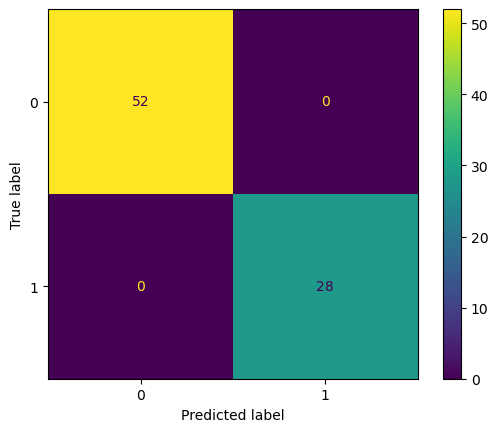

In [15]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_rand_forest.classes_)
disp.plot()
plt.show()

#### ROC

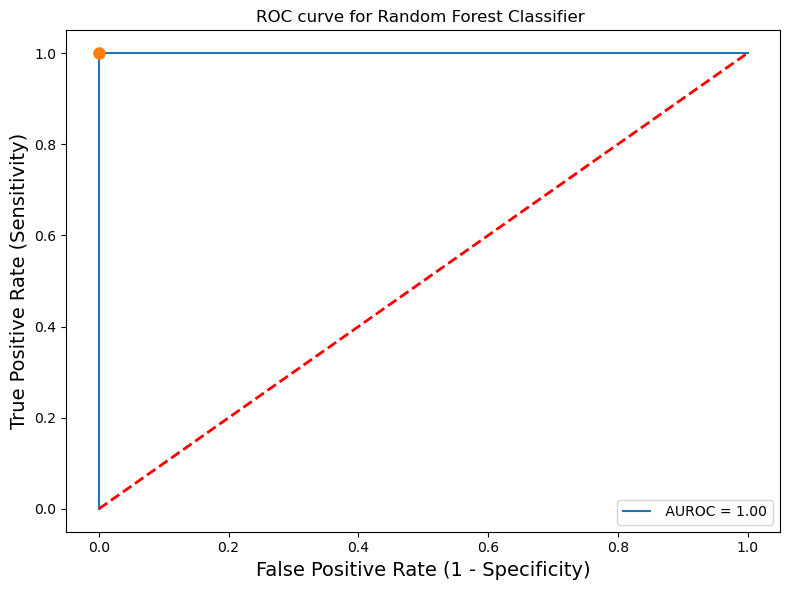

In [16]:

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### SVM

#### Classification Report

In [17]:
Y_pred = clf_svm.predict(X_test)

svm_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



#### Mean Absolute Error

In [18]:

mean_absolute_error(Y_test,Y_pred)

0.0625

#### Root Mean Square Error

In [19]:

mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.25

#### Confusion Matrix

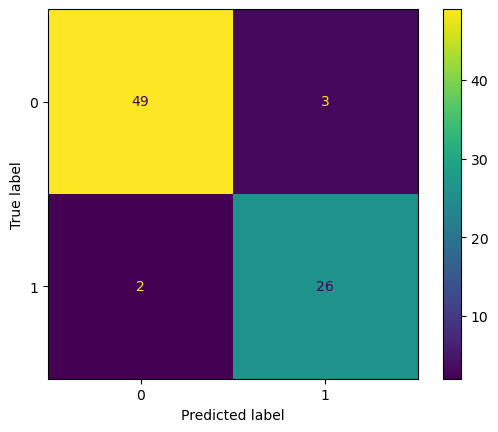

In [20]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

#### ROC

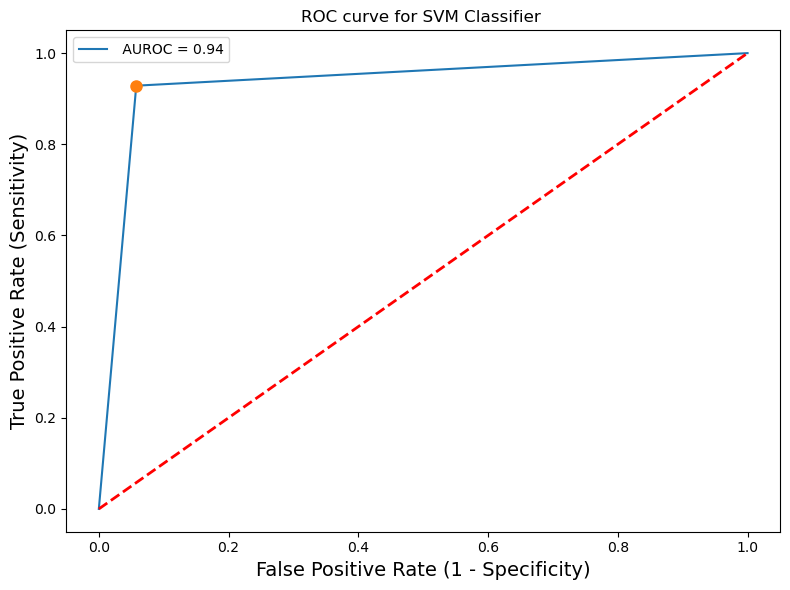

In [21]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVM Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Naive Bayes

#### Classification Report

In [22]:
Y_pred = clf_gnb.predict(X_test)

gnb_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        52
           1       0.88      1.00      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



#### Mean Absolute Error

In [23]:

mean_absolute_error(Y_test,Y_pred)

0.05

#### Root Mean Square Error

In [24]:

mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.22360679774997896

#### Confusion Matrix

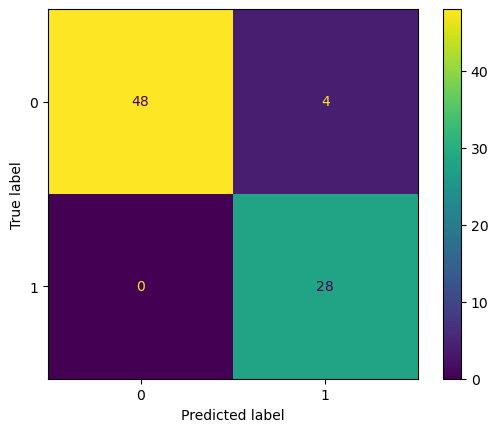

In [25]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_gnb.classes_)
disp.plot()
plt.show()

#### ROC

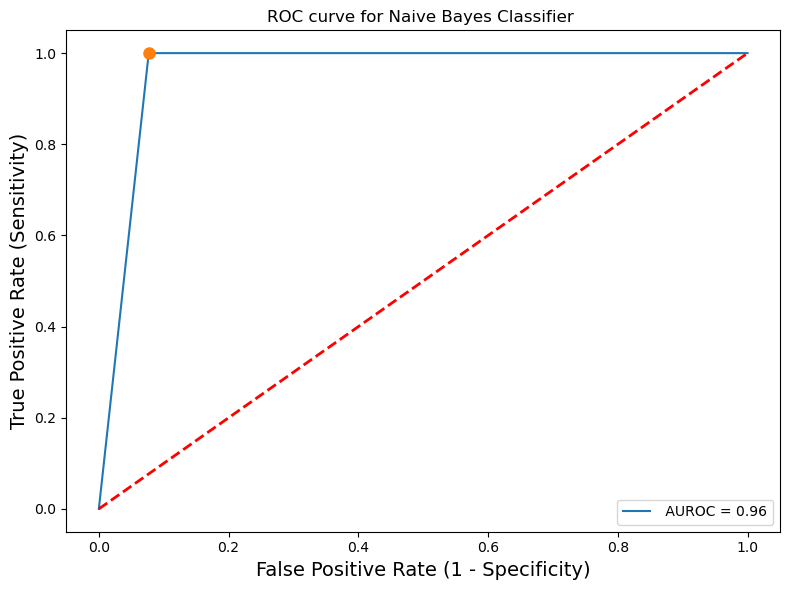

In [26]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Naive Bayes Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Logistic Regression

#### Classification Report

In [27]:
Y_pred = clf_log.predict(X_test)

log_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.96      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



#### Mean Absolute Error

In [28]:

mean_absolute_error(Y_test,Y_pred)

0.05

#### Root Mean Square Error

In [29]:

mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.22360679774997896

#### Confusion Matrix

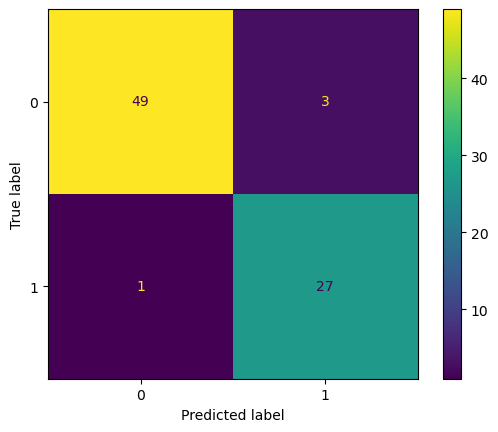

In [30]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_log.classes_)
disp.plot()
plt.show()

#### ROC

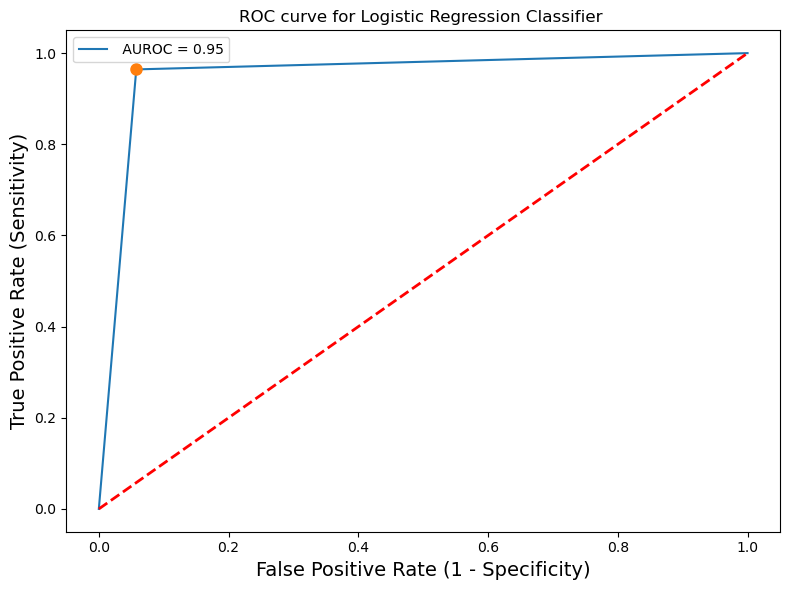

In [31]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Logistic Regression Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### KNN

#### Classification Report

In [32]:
Y_pred = clf_knn.predict(X_test)

knn_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        52
           1       0.72      1.00      0.84        28

    accuracy                           0.86        80
   macro avg       0.86      0.89      0.86        80
weighted avg       0.90      0.86      0.87        80



#### Mean Absolute Error

In [33]:

mean_absolute_error(Y_test,Y_pred)

0.1375

#### Root Mean Square Error

In [34]:

mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.37080992435478316

#### Confusion Matrix

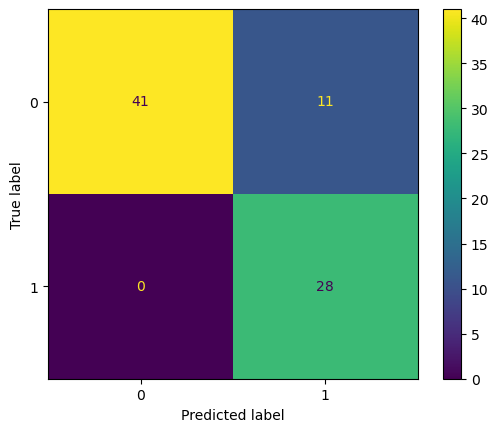

In [35]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_knn.classes_)
disp.plot()
plt.show()

#### ROC

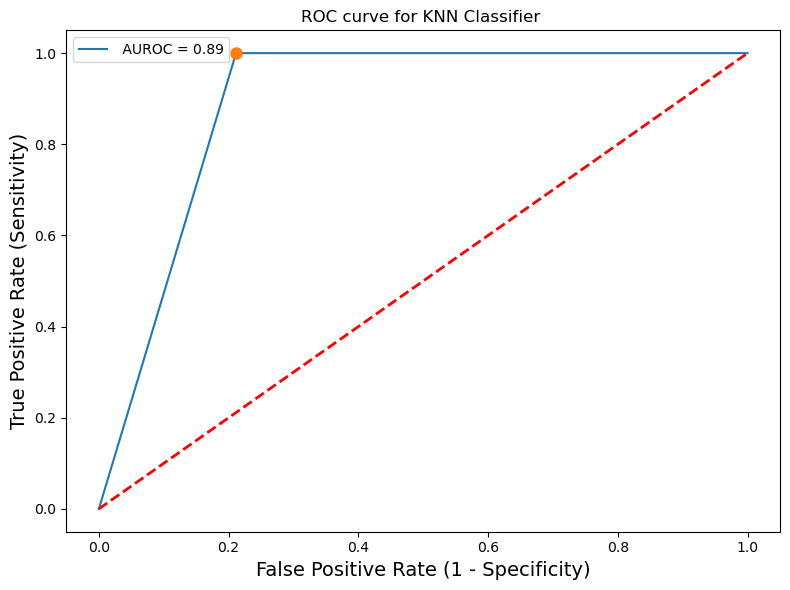

In [36]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Decision Tree

#### Classification Report

In [37]:
Y_pred = clf_dtc.predict(X_test)

dtc_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



#### Mean Absolute Error

In [38]:
mean_absolute_error(Y_test,Y_pred)

0.0375

#### Root Mean Square Error

In [39]:
mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.19364916731037085

#### Confusion Matrix

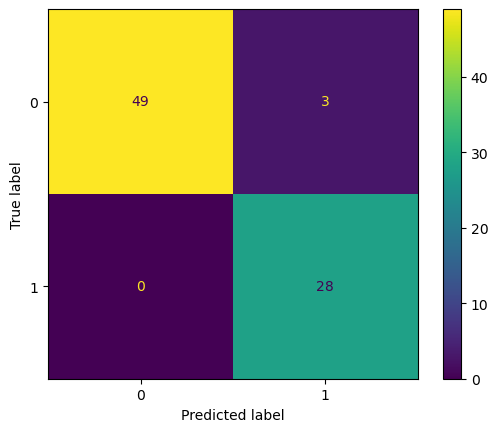

In [40]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_dtc.classes_)
disp.plot()
plt.show()

#### ROC

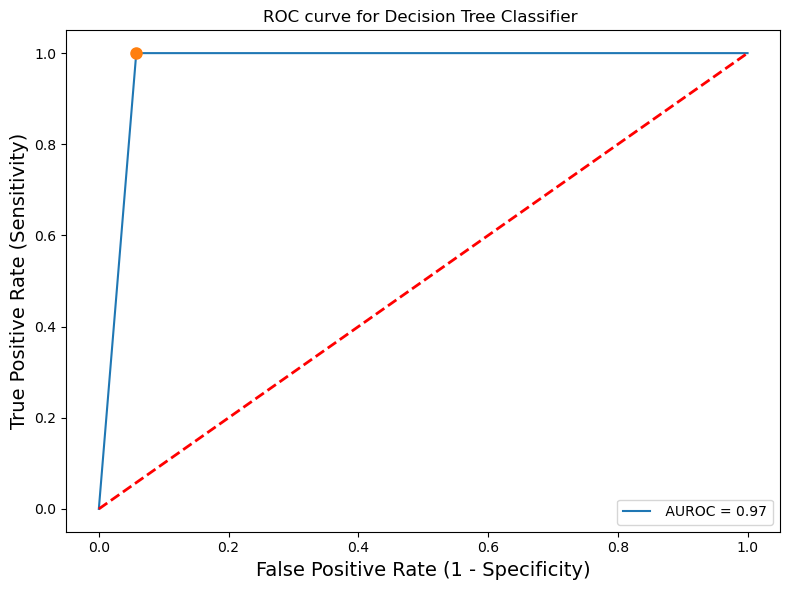

In [41]:
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### Ada Boost

#### Classification Report

In [42]:
Y_pred = clf_ada.predict(X_test)

ada_acc = accuracy_score(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



#### Mean Absolute Error

In [43]:

mean_absolute_error(Y_test,Y_pred)

0.0125

#### Root Mean Square Error

In [44]:

mean_squared_error(Y_test,Y_pred, squared=False)

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11180339887498948

#### Confusion Matrix

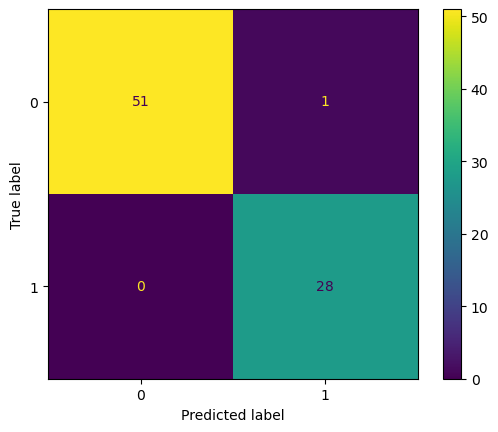

In [45]:
#  Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_ada.classes_)
disp.plot()
plt.show()

#### ROC

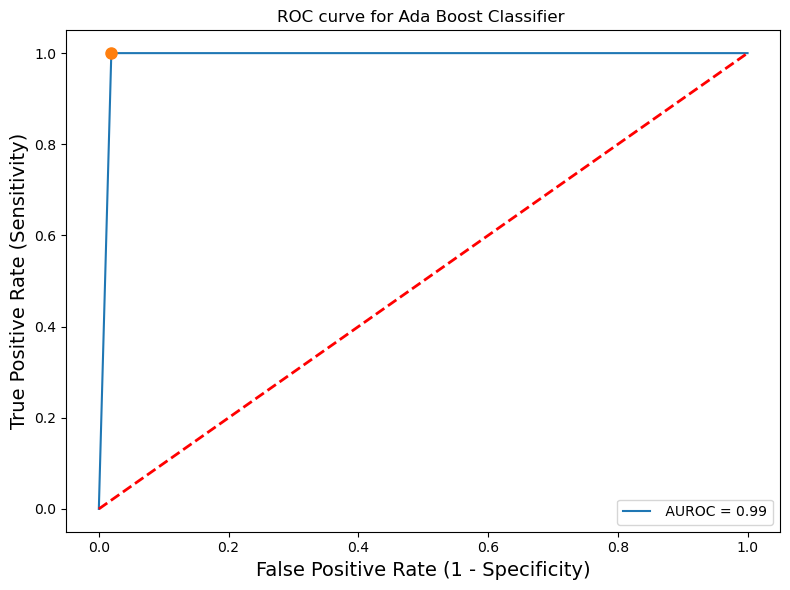

In [46]:
fig, (ax2) = plt.subplots(figsize = (8,6))
#roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Ada Boost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Model Comparison

In [47]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'Naive Bayes Classifier','KNN Classifier',
               'Decision Tree Classifier', 'Ada_Boost Classifier'],
    'Score' : [rand_forest_acc, svm_acc, gnb_acc, knn_acc, dtc_acc, ada_acc]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [48]:
import pickle 

In [49]:
new_data.to_csv('new_data.csv')

In [50]:
new_data

,age,serum_creatinine,blood_pressure,blood_urea,haemoglobin,albumin,blood_glucose_random,potassium,aanemia,hypertension,class
0,48.0,1.2,80.0,36.0,15.4,1.0,121.0,3.5,0,1,0
1,7.0,0.8,50.0,18.0,11.3,4.0,117.0,5.0,0,0,0
2,62.0,1.8,80.0,53.0,9.6,2.0,423.0,4.6,1,0,0
3,48.0,3.8,70.0,56.0,11.2,4.0,117.0,2.5,1,1,0
4,51.0,1.4,80.0,26.0,11.6,2.0,106.0,3.8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.5,80.0,49.0,15.7,0.0,140.0,4.9,0,0,1
396,42.0,1.2,70.0,31.0,16.5,0.0,75.0,3.5,0,0,1
397,12.0,0.6,80.0,26.0,15.8,0.0,100.0,4.4,0,0,1
398,17.0,1.0,60.0,50.0,14.2,0.0,114.0,4.9,0,0,1


In [51]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [52]:
X

,age,serum_creatinine,blood_pressure,blood_urea,haemoglobin,albumin,blood_glucose_random,potassium,aanemia,hypertension
0,48.0,1.2,80.0,36.0,15.4,1.0,121.0,3.5,0,1
1,7.0,0.8,50.0,18.0,11.3,4.0,117.0,5.0,0,0
2,62.0,1.8,80.0,53.0,9.6,2.0,423.0,4.6,1,0
3,48.0,3.8,70.0,56.0,11.2,4.0,117.0,2.5,1,1
4,51.0,1.4,80.0,26.0,11.6,2.0,106.0,3.8,0,0
...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.5,80.0,49.0,15.7,0.0,140.0,4.9,0,0
396,42.0,1.2,70.0,31.0,16.5,0.0,75.0,3.5,0,0
397,12.0,0.6,80.0,26.0,15.8,0.0,100.0,4.4,0,0
398,17.0,1.0,60.0,50.0,14.2,0.0,114.0,4.9,0,0


In [53]:
# [[40,80,1.02,1,0,1,1,0,0,121,36,1.2,134,3.5,15.4,44,7800,5.2,1,1,0,0,0,0]] - gives output of 0
# [[40,80,1.025,0,0,1,1,0,0,140,10,1.2,135,5,15,48,10400,4.5,0,0,0,0,0,0]] - gives output of 1

In [54]:
# # Save Random Forest Model into a file
# Random_Forest_model1 = 'Random_forest_model1.pkl'
# with open(Random_Forest_model1, 'wb') as file:
#     pickle.dump(clf_rand_forest, file)
# print(f'Random_forest model saved to {Random_Forest_model1}')

In [55]:
pred1int = [48,1.2,80,36,15.4,1.0,121.0,3.5,0,1]
pred1 = clf_rand_forest.predict([pred1int])
pred1



c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0], dtype=int64)

In [56]:
pred2 = clf_rand_forest.predict([[55,0.5,80,49.0,15.7,0.0,140.0,4.9,0,0]])
pred2

c:\Users\yashk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1], dtype=int64)